In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

print("Setup complete")

Setup complete


## Data Analytics Problem
- Regression: Predicting if a flight will be delayed and the amount of delay of a flight based on certain factors.
- Classification: Predicting if the flight will be cancelled or not.

## Load the dataset

In [9]:
df = pd.read_csv("./datasets/airline_delay.csv")

## Exploratory Data Analysis

In [20]:
# List all columns and types
df.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [21]:
# Check missing values
df.isna().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64

## Predicting Arrival Delay Time Using Linear Regression
**Features**:
- arr_flights: Number of flights arriving at airport.
- carrier_ct: carrier
- weather_ct: Number of fgllights delayed due to inclement weatweather.
- nas_ct: Number of flgiights delayed dye toue to National Aviation System,.
- security_ct: Number of flights delayed due to a security breach.
- late_aircraft_ct: craft_ct: Number of flights delayed as a result of another flight on the same aircraft delayed.

**Target**:
- arr_delay: Delay duration in minutes.

## Selecting the features and target

In [28]:
features_arrival_delay = ['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
target_variable = 'arr_delay'

## Plotting each feature vs target

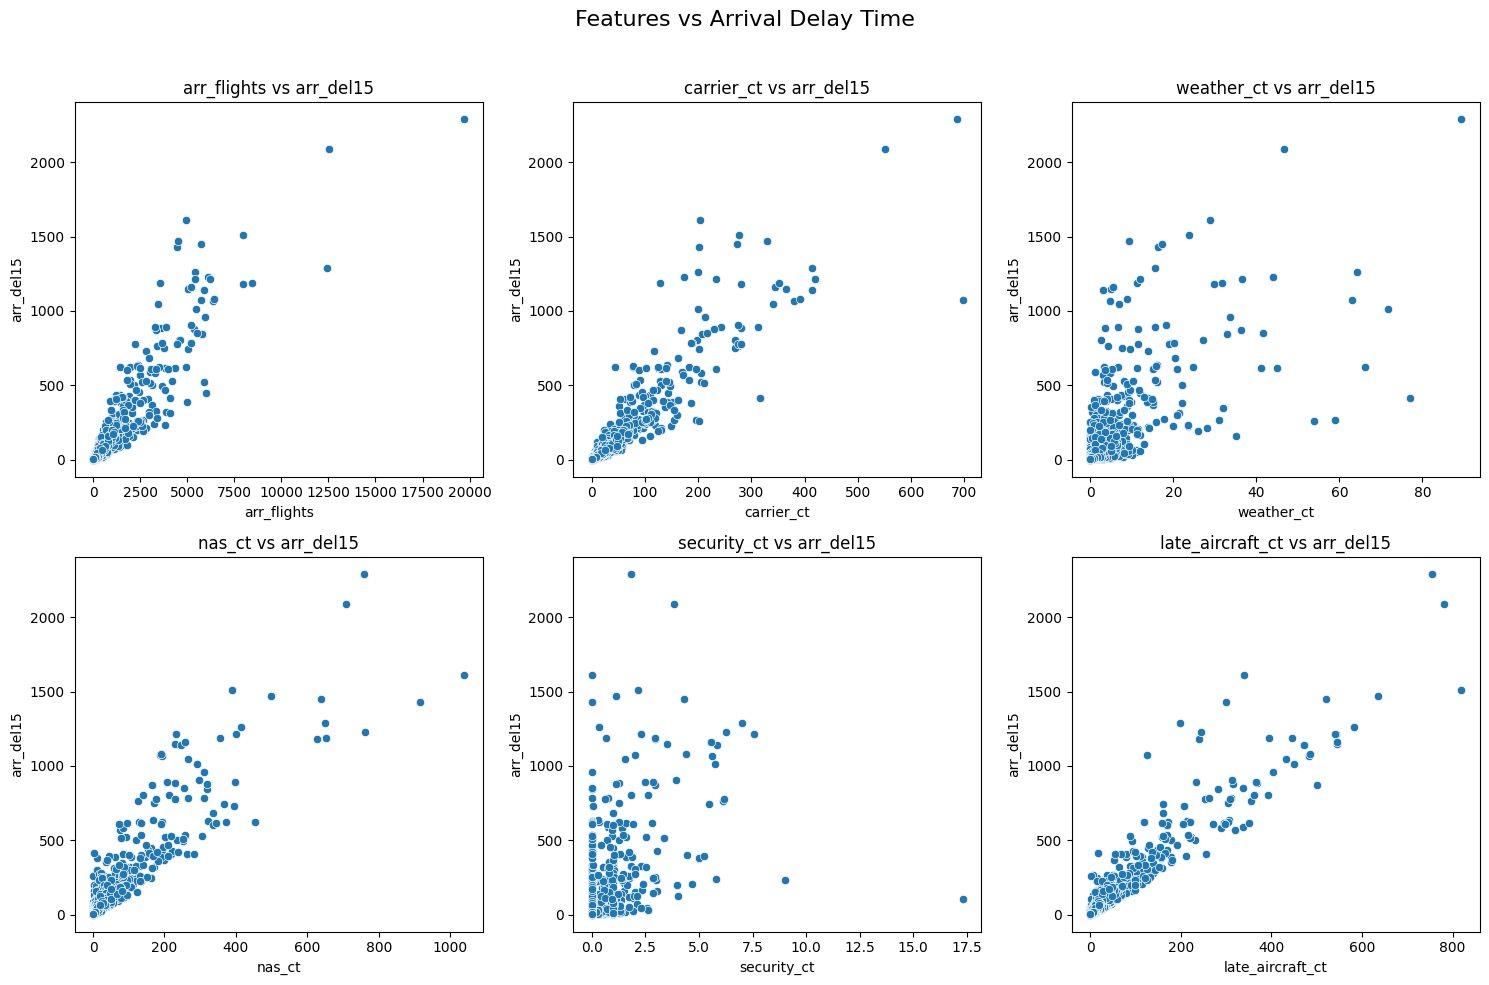

In [39]:
def features_vs_delay_plot():  
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    fig.suptitle('Features vs Arrival Delay Time', fontsize=16)
    
    for i, feature in enumerate(features_arrival_delay):
        row, col = divmod(i, 3)
        sns.scatterplot(x=feature, y=target_variable, data=df, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs {target_variable}')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

features_vs_delay_plot()

## Building the regression model

Mean Squared Error: 1.959041049924143e-05


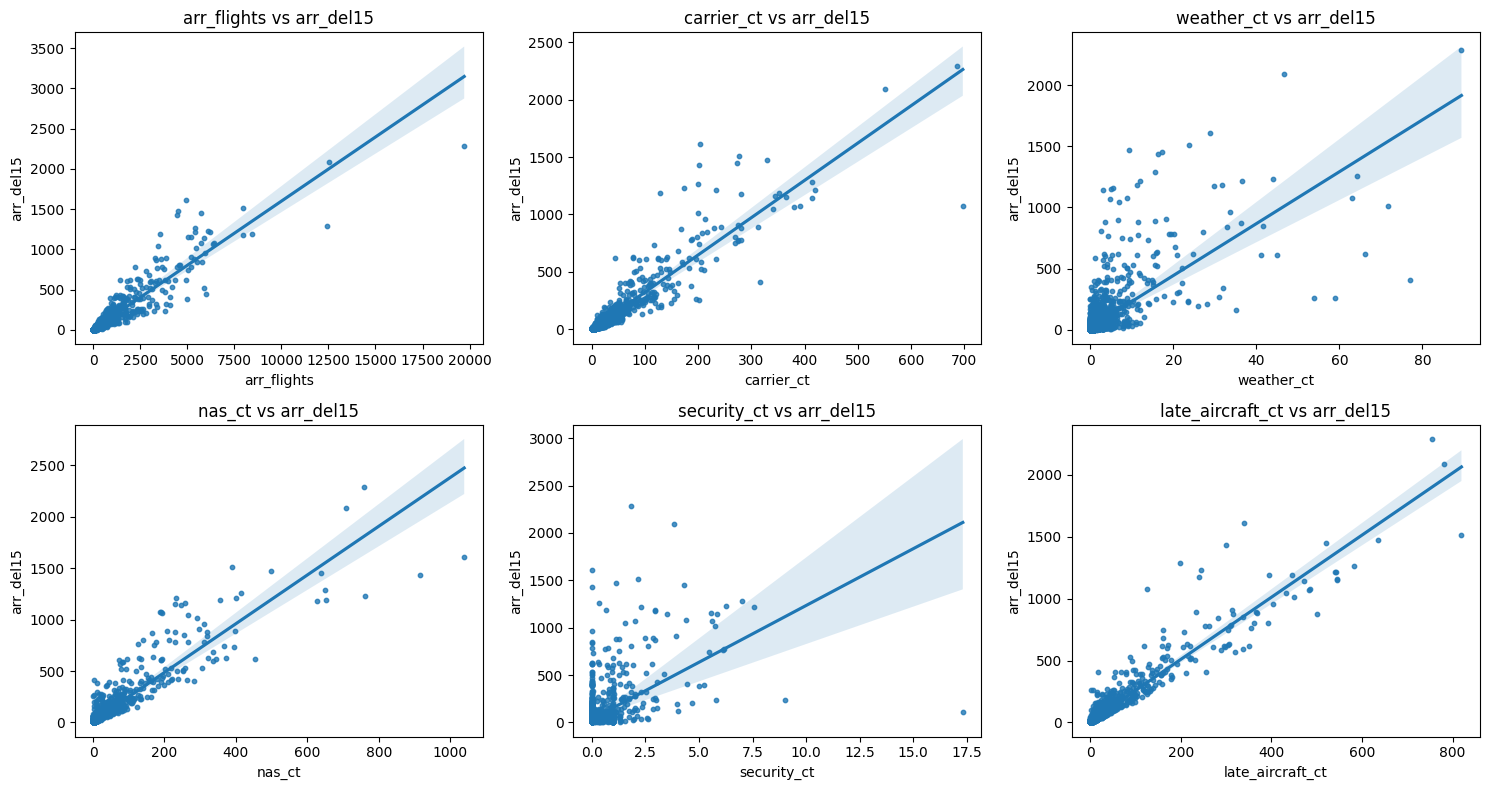

In [41]:
def build_arrival_delay_regression_model():
    # Create a copy of the DataFrame with only the selected features and the target variable
    data_subset = df[features_arrival_delay + [target_variable]].copy()
    
    # Drop rows with missing values
    data_subset.dropna(inplace=True)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        data_subset[features_arrival_delay],
        data_subset[target_variable],
        test_size=0.2,
        random_state=42
    )
    
    # Create a linear regression model
    reg_model = LinearRegression()
    
    # Fit the model on the training data
    reg_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = reg_model.predict(X_test)

    # Calculate and print the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
        
    # Plot regression plots
    plt.figure(figsize=(15, 8))
    for i, feature in enumerate(features_arrival_delay):
        plt.subplot(2, 3, i + 1)
        sns.regplot(x=feature, y=target_variable, data=data_subset, scatter_kws={'s': 10})
        plt.title(f'{feature} vs {target_variable}')
    
    plt.tight_layout()
    plt.show()

    return reg_model

reg_model = build_arrival_delay_regression_model()

## Regression Equation

In [44]:
# Intercept
intercept = reg_model.intercept_

# Coefficients
coefficients = reg_model.coef_

# Feature names
feature_names = features_arrival_delay

# Display the regression equation
equation = f'{target_variable} = {intercept:.4f} '
for feature, coef in zip(feature_names, coefficients):
    equation += f'+ {coef:.4f} * {feature} '

print(equation)

arr_del15 = 0.0001 + 0.0000 * arr_flights + 1.0000 * carrier_ct + 1.0000 * weather_ct + 1.0000 * nas_ct + 1.0000 * security_ct + 1.0000 * late_aircraft_ct 


## Logistic Regression

Accuracy: 0.6816143497757847
Precision: 0.7777777777777778
Recall: 0.3822525597269625
F1 Score: 0.5125858123569794

Confusion Matrix:
[[344  32]
 [181 112]]


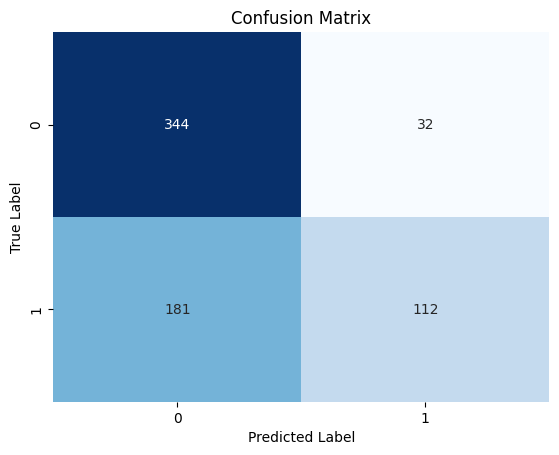

In [36]:
features_cancellations = ['weather_ct', 'security_ct', 'nas_ct']

# Target variable
target_variable = 'arr_cancelled'

# Create a copy of the DataFrame with only the selected features and the target variable
data_subset = df[features_cancellations + [target_variable]].copy()

# Drop rows with missing values
data_subset.dropna(inplace=True)

# Convert target variable to binary (1 for cancelled, 0 for not cancelled)
data_subset[target_variable] = data_subset[target_variable].apply(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_subset[features_cancellations],
    data_subset[target_variable],
    test_size=0.2,
    random_state=42
)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate and print classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\nConfusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


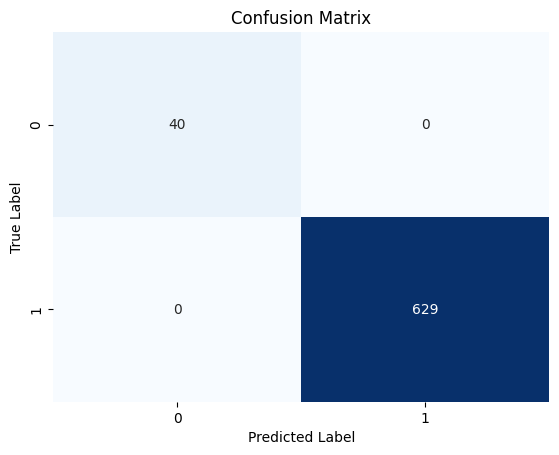

In [38]:
# Assuming df is your DataFrame
# Features for predicting arrival delays beyond 15 minutes
features_delay_classification = ['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Target variable
target_variable = 'arr_del15'

# Create a copy of the DataFrame with only the selected features and the target variable
data_subset = df[features_delay_classification + [target_variable]].copy()

# Drop rows with missing values
data_subset.dropna(inplace=True)

# Convert target variable to binary (1 for delayed, 0 for not delayed)
data_subset[target_variable] = data_subset[target_variable].apply(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_subset[features_delay_classification],
    data_subset[target_variable],
    test_size=0.2,
    random_state=42
)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate and print classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()